In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from patsy import dmatrices
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend, figure

### Here you will find: 

- Initial data summary
- Multivariable linear regression assumption test.
- Feature Importance
- MMM with daily data
- MMM with Weekly data.
- Log-log model.

## Data Summary

In [2]:
# Load the model data
df = pd.read_csv('EMMMTable.csv',dtype={
    'Revenue': np.float64,
    'Google BA': np.float64,
    'Google SA': np.float64,
    'Microsoft BA': np.float64,
    'Microsoft SA': np.float64
}, parse_dates=['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df['WeekNumber'] = pd.DatetimeIndex(df['Date']).week
df.head()

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39857/1153395766.py:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekNumber'] = pd.DatetimeIndex(df['Date']).week


,Date,Google BA,Google SA,Microsoft BA,Microsoft SA,Revenue,Year,Month,Year_Month,WeekNumber
0,2018-01-01,64.65,343.70,NaN,NaN,5267.25,2018,1,2018-1,1
1,2018-01-02,76.00,369.35,NaN,NaN,8232.66,2018,1,2018-1,1
2,2018-01-03,60.58,323.69,NaN,NaN,5422.94,2018,1,2018-1,1
3,2018-01-04,65.49,316.66,NaN,NaN,4433.26,2018,1,2018-1,1
4,2018-01-05,63.41,302.25,NaN,NaN,5497.55,2018,1,2018-1,1


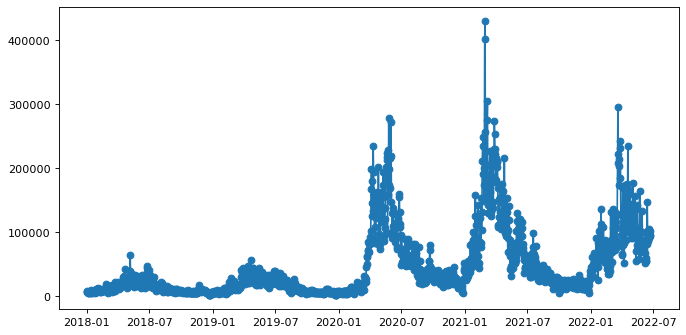

In [3]:
figure(figsize=(10, 5), dpi=80)
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.show()

## Data Quality and Analysis

### NaN Values

In [4]:
df[df != 0.0].drop('Year_Month', 1).isna().groupby(df.Year_Month, sort=False).sum().reset_index()

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39857/742069122.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df[df != 0.0].drop('Year_Month', 1).isna().groupby(df.Year_Month, sort=False).sum().reset_index()


,Year_Month,Date,Google BA,Google SA,Microsoft BA,Microsoft SA,Revenue,Year,Month,WeekNumber
0,2018-1,0,0,0,31,31,0,0,0,0
1,2018-2,0,0,0,28,28,0,0,0,0
2,2018-3,0,0,0,31,31,0,0,0,0
3,2018-4,0,0,0,30,30,0,0,0,0
4,2018-5,0,0,0,31,31,0,0,0,0
5,2018-6,0,0,0,30,30,0,0,0,0
6,2018-7,0,0,0,31,31,0,0,0,0
7,2018-8,0,0,0,31,31,0,0,0,0
8,2018-9,0,0,0,30,30,0,0,0,0
9,2018-10,0,0,0,31,31,0,0,0,0


In [5]:
df = df.fillna(0)
df.head()

,Date,Google BA,Google SA,Microsoft BA,Microsoft SA,Revenue,Year,Month,Year_Month,WeekNumber
0,2018-01-01,64.65,343.70,0.0,0.0,5267.25,2018,1,2018-1,1
1,2018-01-02,76.00,369.35,0.0,0.0,8232.66,2018,1,2018-1,1
2,2018-01-03,60.58,323.69,0.0,0.0,5422.94,2018,1,2018-1,1
3,2018-01-04,65.49,316.66,0.0,0.0,4433.26,2018,1,2018-1,1
4,2018-01-05,63.41,302.25,0.0,0.0,5497.55,2018,1,2018-1,1


### Revenue Behaviour

In [6]:
df[['Revenue', 'Year']].groupby('Year').describe()

Revenue                                                              \
       count          mean           std      min         25%        50%   
Year                                                                       
2018   365.0  12641.969973   8692.452474   853.04   6338.8300   9423.830   
2019   365.0  15297.166164  11014.089602   450.51   5811.8100  12055.980   
2020   366.0  56920.579809  55355.324975  2756.21  18867.5575  33906.095   
2021   365.0  70290.582575  66215.209320  4208.42  23472.8800  45339.340   
2022   174.0  95202.615460  46407.351798     0.00  64116.6425  85904.770   

                             
             75%        max  
Year                         
2018   17118.240   63864.46  
2019   23473.830   56033.04  
2020   81155.305  278322.81  
2021  101770.720  429761.34  
2022  110651.010  294708.69

In [7]:
df[['Revenue', 'Year']].groupby('Year').agg(['sum'])

,Revenue
,sum
Year,
2018,4614319.04
2019,5583465.65
2020,20832932.21
2021,25656062.64
2022,16565255.09


<AxesSubplot:title={'center':'Revenue'}, xlabel='[Year]'>

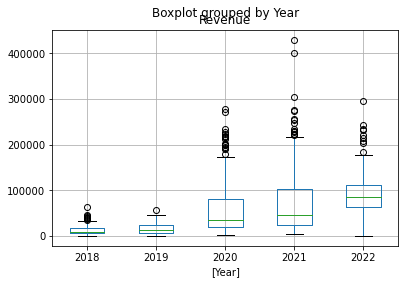

In [8]:
df[['Revenue', 'Year']].boxplot(by='Year')

Conclusion

* 2019 Investment into marketing channels began at the end of the year
* 2020 because of covid has a lot of nuisance variables that we cannot account for
* 2022 we don't have enough data.
* 2020 there are several periods without channel investment (probably because of COVID)

Focus the analysis on 2021 data for now and see how later how the model holds in other periods

### From this point forward just information from 2021 will be described

We are accounting for too few variables in the MMM model. By using 2021 data only, we want to reduce the risk of observation external behavior not related to variables that we can measure/control.

In [9]:
df_2021=df[df['Year']==2021].sort_values("Date").reset_index(drop=True)
df_2021.head()

,Date,Google BA,Google SA,Microsoft BA,Microsoft SA,Revenue,Year,Month,Year_Month,WeekNumber
0,2021-01-01,287.68,952.01,46.97,139.34,46798.24,2021,1,2021-1,53
1,2021-01-02,374.84,1299.94,36.64,157.67,49179.67,2021,1,2021-1,53
2,2021-01-03,381.01,1455.83,50.65,164.49,45669.43,2021,1,2021-1,53
3,2021-01-04,295.14,845.52,52.35,137.55,34401.97,2021,1,2021-1,1
4,2021-01-05,311.55,686.04,45.64,136.90,24122.14,2021,1,2021-1,1


## Channel Investment Behaviour

In [10]:
df_2021[["Google BA","Google SA","Microsoft BA","Microsoft SA"]].agg(['sum'])

,Google BA,Google SA,Microsoft BA,Microsoft SA
sum,218806.01,488721.47,66083.74,54930.88


### Variable Correlations

In [11]:
corr = df_2021[["Google BA","Google SA","Microsoft BA","Microsoft SA"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39857/1087105175.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Google BA,Google SA,Microsoft BA,Microsoft SA
Google BA,1.00,0.67,0.27,0.57
Google SA,0.67,1.00,0.29,0.69
Microsoft BA,0.27,0.29,1.00,0.14
Microsoft SA,0.57,0.69,0.14,1.00


In [13]:
pca = PCA()
pca.fit(df_2021[["Google BA","Google SA","Microsoft BA","Microsoft SA"]])
pca.explained_variance_ratio_ 

array([0.94019897, 0.03976829, 0.01555044, 0.0044823 ])

## Feature Importance

In [14]:
df_2021.isnull().any()

Date            False
Google BA       False
Google SA       False
Microsoft BA    False
Microsoft SA    False
Revenue         False
Year            False
Month           False
Year_Month      False
WeekNumber      False
dtype: bool

<AxesSubplot:>

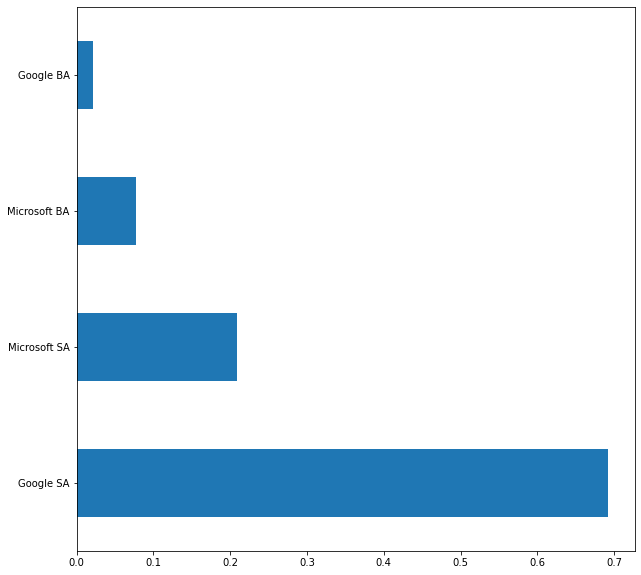

In [16]:
df_fi = df_2021.drop(['Date','Year','Month','Year_Month','WeekNumber'], axis=1)
X = df_fi.loc[:, df_fi.columns != 'Revenue']
y = df_fi['Revenue']
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [18]:
df[["Google BA","Google SA","Microsoft BA","Microsoft SA"]].agg(['sum'])

,Google BA,Google SA,Microsoft BA,Microsoft SA
sum,919500.13,1715002.65,139040.44,97832.45


In [17]:
df[['Revenue','Year',"Google BA","Google SA","Microsoft BA","Microsoft SA"]].groupby('Year').agg(['sum'])

,Revenue,Google BA,Google SA,Microsoft BA,Microsoft SA
,sum,sum,sum,sum,sum
Year,,,,,
2018,4614319.04,47988.29,165776.59,0.00,0.00
2019,5583465.65,91127.08,222636.03,5224.26,7809.45
2020,20832932.21,136971.70,451848.52,46653.22,26814.43
2021,25656062.64,218806.01,488721.47,66083.74,54930.88
2022,16565255.09,424607.05,386020.04,21079.22,8277.69


This shows that despite an incredible amount of investment, the Google BA marketing channel has very little importance
with respect to generating Revenue
GoogleSA has had the most investment for the longest time and this is reflected in its importance.
Microsoft SA despite having the least investment has been shown to be the second most important feature. 

### Normality Tets

In [19]:
from scipy.stats import normaltest
for column in ["Google BA","Google SA","Microsoft BA","Microsoft SA","Revenue"]:
    print("{}: {}".format(column, normaltest(df_2021[column])))

Google BA: NormaltestResult(statistic=69.65728309516717, pvalue=7.483644757240629e-16)
Google SA: NormaltestResult(statistic=132.48756016129036, pvalue=1.700951186709491e-29)
Microsoft BA: NormaltestResult(statistic=25.175194512267904, pvalue=3.414097906245708e-06)
Microsoft SA: NormaltestResult(statistic=226.29400677814684, pvalue=7.2590666548116565e-50)
Revenue: NormaltestResult(statistic=142.47751601664964, pvalue=1.1518621279248261e-31)


### Regression Fit 

In [113]:
df_2021 = df_2021.rename(columns={
    "Google BA":'gBA', 'Google SA':'gSA', 'Microsoft BA': "mBA", 'Microsoft SA': "mSA"
})

### Daily Regressions

In [114]:
lm_day_model = sm.ols(formula="Revenue~gBA+"
                          "gSA+"
                          "mBA+"
                          "mSA", data=df_2021).fit()
print(lm_day_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     998.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.81e-276
Time:                        21:32:48   Log-Likelihood:                -7521.0
No. Observations:                 657   AIC:                         1.505e+04
Df Residuals:                     652   BIC:                         1.507e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.678e+04   1673.376    -10.027      0.0

### Multicollinearity Test

VIF and multicollinearity->https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [115]:
y, X = dmatrices("Revenue~gBA+gSA+mBA+mSA", df_2021.rename(columns={
        "Google BA":'gBA', 'Google SA':'gSA', "Microsoft BA":'mBA', 'Micrososft SA':'mSA'
}), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,3.554468,Intercept
1,2.168624,gBA
2,2.734277,gSA
3,1.544285,mBA
4,1.436172,mSA


### Predictions for the Daily Model

2021 Predictions:

In [116]:
predictions_daily = pd.DataFrame({
    'Predictions':lm_day_model.predict(df_2021[['gBA','gSA','mBA','mSA']]),
    'Revenue': df_2021['Revenue'],
    'Date': df_2021['Date']
})
predictions_daily['ErrorAbs'] = abs(predictions_daily['Predictions'] - predictions_daily['Revenue'])
predictions_daily= predictions_daily.set_index('Date')
predictions_daily.head()

,Predictions,Revenue,ErrorAbs
Date,,,
2020-01-01,6137.609944,7707.98,1570.370056
2020-01-02,4877.890570,5788.82,910.929430
2020-01-03,1110.358210,7808.98,6698.621790
2020-01-04,-2979.864957,4953.98,7933.844957
2020-01-05,2338.200757,4641.32,2303.119243


mape(predictions_daily['Predictions'], predictions_daily['Revenue']) 
-> ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

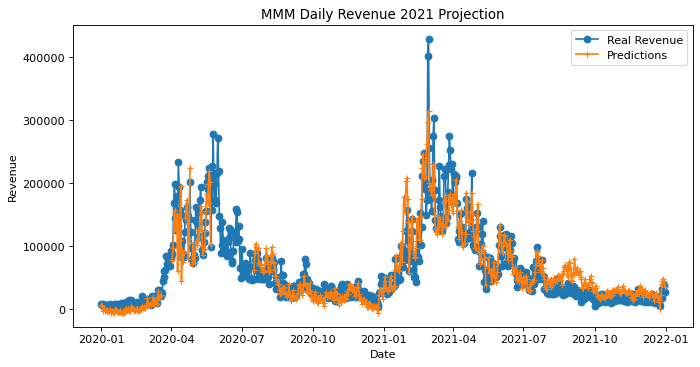

In [117]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_daily["Revenue"], marker='o')
plt.plot(predictions_daily["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Daily Revenue 2021 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

### 2022 Daily 

In [118]:
df_2022=df[df['Year']==2022].rename(columns={
   "Google BA":'gBA', 'Google SA':'gSA',"Microsoft BA":'mBA', 'Microsoft SA':'mSA'
}).reset_index(drop=True)
predictions_daily = pd.DataFrame({
    'Predictions':lm_day_model.predict(df_2022[['gBA','gSA','mBA','mSA']]),
    'Revenue': df_2022['Revenue'],
    'Date': df_2022['Date']
})
predictions_daily['ErrorAbs'] = abs(predictions_daily['Predictions'] - predictions_daily['Revenue'])
predictions_daily= predictions_daily.set_index('Date')
predictions_daily.head()

,Predictions,Revenue,ErrorAbs
Date,,,
2022-01-01,48893.053584,39040.44,9852.613584
2022-01-02,60895.476134,45752.44,15143.036134
2022-01-03,67455.102538,38209.17,29245.932538
2022-01-04,48780.053515,41223.72,7556.333515
2022-01-05,40275.969968,60293.09,20017.120032


In [119]:
predictions_daily.to_csv('E_Daily_2022_predvact.csv')

mape(predictions_daily['Predictions'], predictions_daily['Revenue']) -> ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


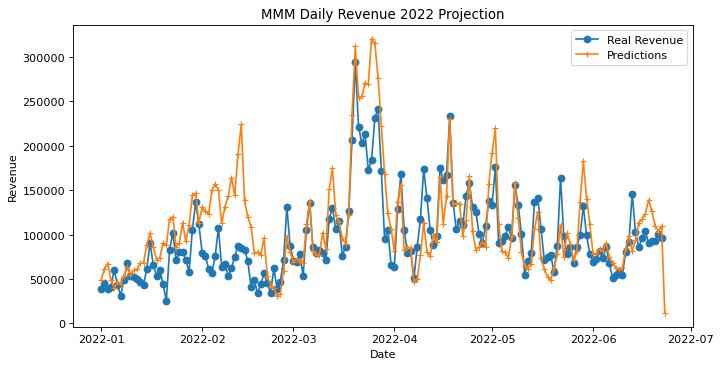

In [121]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_daily["Revenue"], marker='o')
plt.plot(predictions_daily["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Daily Revenue 2022 Projection")
plt.legend(['Real Revenue', 'Predictions'])

# Display
plt.show()

### Predictions for the Weekly Model# Weekly

Transforming 2021 data to be Weekly:

In [123]:
df_2021_week=df_2021[['Revenue', 'gBA','gSA','mBA','mSA', 'WeekNumber']]
df_2021_week=df_2021_week[df_2021_week['WeekNumber'] < 52].groupby('WeekNumber').agg([sum])
df_2021_week =  df_2021_week[['Revenue', 'gBA','gSA','mBA','mSA',]].reset_index(drop=True).T.reset_index(drop=True).T.rename(columns={
    0: 'Revenue',
    1: 'gBA',
    2: 'gSA',
    3: 'mBA',
    4: 'mSA',
})
df_2021_week['WeekNumber']=df_2021[df_2021['WeekNumber'] < 52].groupby('WeekNumber').count().reset_index()['WeekNumber']
df_2021_week.tail()

,Revenue,gBA,gSA,mBA,mSA,WeekNumber
46,294731.78,9041.16,6643.21,1012.86,1051.22,47
47,333535.13,8687.17,6408.93,1156.70,910.32,48
48,277260.14,5499.24,5936.42,1002.14,569.69,49
49,230197.86,4562.19,5898.61,936.92,458.19,50
50,190877.11,2280.98,6171.20,758.90,468.39,51


2022 Data

In [125]:
df_2022_week=df_2022[['Revenue', 'gBA','gSA','mBA','mSA', 'WeekNumber']]
df_2022_week=df_2022_week[df_2022_week['WeekNumber'] < 52].groupby('WeekNumber').agg([sum])
df_2022_week =  df_2022_week[['Revenue', 'gBA','gSA','mBA','mSA']].reset_index(drop=True).T.reset_index(drop=True).T.rename(columns={
    0: 'Revenue',
    1: 'gBA',
    2: 'gSA',
    3: 'mBA',
    4: 'mSA',
})
df_2022_week['WeekNumber']=df_2022[df_2022['WeekNumber'] < 52].groupby('WeekNumber').count().reset_index()['WeekNumber']
df_2022_week.head()

,Revenue,gBA,gSA,mBA,mSA,WeekNumber
0,331120.58,2641.81,11915.92,897.62,105.99,1
1,397597.60,3543.02,17073.36,933.14,145.37,2
2,434005.56,5761.74,21039.10,1014.57,151.21,3
3,603391.77,8561.60,23981.01,1071.87,200.74,4
4,568796.08,12269.93,25580.40,1356.57,214.63,5


Fitting the model

In [128]:
lm_week_model = sm.ols(formula="Revenue~gBA+"
                          "gSA+"
                          "mBA+"
                          "mSA", data=df_2021_week).fit()
print(lm_week_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.44e-28
Time:                        21:37:26   Log-Likelihood:                -677.09
No. Observations:                  51   AIC:                             1364.
Df Residuals:                      46   BIC:                             1374.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.315e+05   5.89e+04     -5.624      0.0

### Multicollinearity Test

In [129]:
y, X = dmatrices("Revenue~gBA+gSA+mBA+mSA", df_2021_week, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,8.027515,Intercept
1,1.985850,gBA
2,3.785026,gSA
3,2.482530,mBA
4,1.481731,mSA


In [130]:
predictions_weekly = pd.DataFrame({
    'Predictions':lm_week_model.predict(df_2021_week[['gBA','gSA','mBA','mSA']]),
    'Revenue': df_2021_week['Revenue'],
    'WeekNumber': df_2021_week['WeekNumber']
})
predictions_weekly['ErrorAbs'] = abs(predictions_weekly['Predictions'] - predictions_weekly['Revenue'])
predictions_weekly.head()

,Predictions,Revenue,WeekNumber,ErrorAbs
0,1.885175e+05,276826.28,1,88308.746596
1,2.670563e+05,393662.64,2,126606.323762
2,5.107641e+05,491166.17,3,19597.901648
3,1.144661e+06,717045.64,4,427615.106642
4,8.392166e+05,734871.81,5,104344.765587


In [131]:
mape(predictions_weekly['Predictions'], predictions_weekly['Revenue'])

0.20233208559442953

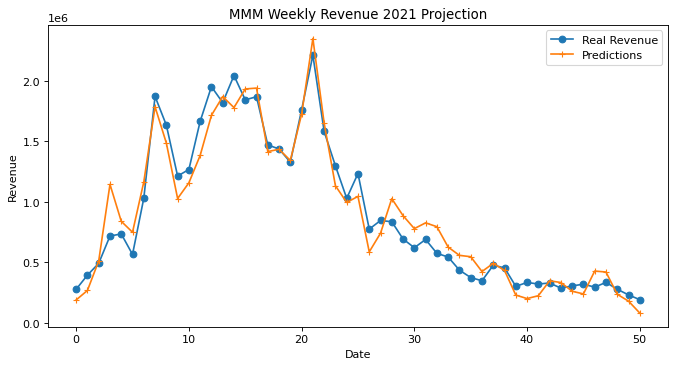

In [132]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_weekly["Revenue"], marker='o')
plt.plot(predictions_weekly["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Weekly Revenue 2021 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

2022:

In [133]:
predictions_weekly = pd.DataFrame({
    'Predictions':lm_week_model.predict(df_2022_week[['gBA','gSA','mBA','mSA']]),
    'Revenue': df_2022_week['Revenue'],
    'WeekNumber': df_2022_week['WeekNumber']
})
predictions_weekly['ErrorAbs'] = abs(predictions_weekly['Predictions'] - predictions_weekly['Revenue'])
predictions_weekly.head()

,Predictions,Revenue,WeekNumber,ErrorAbs
0,205804.746009,331120.58,1,125315.833991
1,365838.002577,397597.60,2,31759.597423
2,545232.769360,434005.56,3,111227.209360
3,720733.216154,603391.77,4,117341.446154
4,931401.026103,568796.08,5,362604.946103


In [134]:
predictions_weekly.to_csv('E_Weekly_2022_predvact.csv')

In [135]:
mape(predictions_weekly['Predictions'], predictions_weekly['Revenue'])

0.26044839863200003

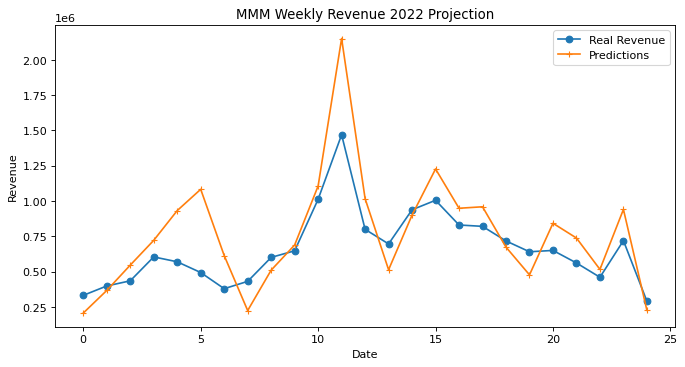

In [136]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_weekly["Revenue"], marker='o')
plt.plot(predictions_weekly["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Weekly Revenue 2022 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

## Log Log Modelling

In [137]:
def transform_log(x):
    if x == 0:
        x += 0.000001
    return math.log(x)

df_2021_log = df_2021_week.rename(columns={
            "Google BA":'gBA', 'Google SA':'gSA', "Microsoft BA":'mBA', 'Microsoft SA':'mSA'

})
for column in ['gBA','gSA','mBA','mSA',"Revenue"]:
    df_2021_log['{}Log'.format(column)] = df_2021_log[column].apply(lambda x: transform_log(x))

In [139]:
log_model = sm.ols(formula="RevenueLog~gBALog+gSALog+mBALog+mSALog", data=df_2021_log).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:             RevenueLog   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     318.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.05e-33
Time:                        21:47:00   Log-Likelihood:                 30.305
No. Observations:                  51   AIC:                            -50.61
Df Residuals:                      46   BIC:                            -40.95
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2120      0.375      5.897      0.0